# STAT 207 Project 03 - REGRESSION ON VIDEO GAME DATA

Shubhan Chari, Rudrakshi Mittal

### Contribution Report

In this contribution report, you should list the following:

1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions of each team member to the report.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

schari3 should be graded. Shubhan Chari (schari3) and Rudrakshi Mittal (rmittal5) worked toether on all parts of this project.

## 1. Introduction

This dataset represents the sales of over 1000 video games released between 2004 and 2010. The data was collected by Dr. Joe Cox, who extracted the data from VGChartz.com. They extrapolated samples from small retail stores in order to estimate sales. However, this data also has a number of other variables for each video game, including **logical**, **quantitative**, and **categorical** variables. In this report, we will use predictions on the **Sales** and **Sequel** variables, where a $1$ in **Sequel** represents a game that is a sequel in a franchise.

This data represents a sample, as it is nearly impossible to find every single game that was released between 2004 and 2010. Furthermore, the sales figures are largely estimates as finding the ground truth would require that every single person that bought the game was surveyed as a part of data collection (which is impossible).

With this in mind, we have **2 research questions**: <br>
1. What is the relationship between the **maximum players** that can play a video game and the **total number of US sales** for a video game released between 2004 and 2010, assuming that we hold other variables (Company, Used Price, Rating, Year Released, and if a game is Handheld) constant. Is this consistent between sample data and the underlying population? Is this model generalizable to new data?<br>
2. What is the relationship between the log-odds of a video game having a sequel and the **console** that a video game was released on, **the year that it was released**, the **review score** of a game, and if the game is in the **3rd person perspective** in our training data for video games released between 2004 and 2010? Is this model applicable to any new data that we may introduce? Then, can we use a classifier based off of this model to predict whether any given game?

As stated before, our response variables are **US Sales (millions)** and **Sequel**. **US Sales (millions)** is a **quantitative** variable that is an estimate of the total number of sales in the United States, collected through subsampling as described earlier. The **Sequel** variable is a **logical** variable, where a $0$ means that the video game is not a sequel of an existing video game franchise, while a $1$ means that the video game is a sequel of an existing video game franchise. For example, Spider-Man 2 is a **sequel** of Spider-Man.

As students that have played video games throughout our lives, the posed research questions will allow video game enthusiasts and companies alike to analyze the qualities and structures that define a "successful" video game. A game that has large amount of sales, for example, may have a few reasons for why that game became so popular, and companies can analyze those variables for future business/development decisions. Another indicator of success is if a game is a sequel. If a game has a sequel, then the franchise is so successful that there is demand for a similar game. Companies and game enthusiasts can analyze what factors may play into a game being successful or not.

In [85]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("video_games.csv",encoding="unicode-escape")
df = df.rename(columns={"US Sales (millions)": "Sales"}) # Rename US Sales (millions) to Sales
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('-','')
df.columns = df.columns.str.replace(' ','')
df.head()

,Console,Title,Sales,Block4,Block2,Block1,Block05,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Rerelease,Usedprice,lnUsedPrice,ReviewScore,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,0,0,0,0,0,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., L...",Action,1,1,24.95,3.216874,85,7225,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,0,0,0,0,0,4016016,"Bandai Co., Ltd., Ubisoft Entertainment SA, Ub...",Strategy,0,0,14.95,2.704711,89,7921,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,0,0,0,0,0,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., L...","Action, Racing / Driving, Sports",1,0,22.95,3.133318,81,6561,1,0,0,0,0,2,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,0,0,0,0,0,4016016,"Sony Computer Entertainment America, Inc., SCE...",Sports,0,0,12.95,2.561096,81,6561,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,0,0,0,0,0,4016016,"Activision Asia-Pacific, Activision Deutschlan...",Action,1,0,14.95,2.704711,61,3721,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


## 2. Linear Regression Analytical Tasks

Our research question for this section is: 

What is the relationship between the **maximum players** that can play a video game and the **total number of US sales** for a video game released between 2004 and 2010, assuming that we hold other variables (Company, Used Price, Rating, Year Released, and if a game is Handheld) constant. Is this consistent between sample data and the underlying population? Is this model generalizable to new data?

### 2b. Preprocessing and Train Test Split

In [ ]:
# turned all binary variables of each company to categorical with help from ChatGPT
df['Company'] = df[['2K','Acclaim','Activision','Atari','Capcom','Disney','Eidos','EA','Infograme','Konami','Microsoft','Midway','Namco','Nintendo','Rockstar','Sony','Sega','THQ','SquareEnix','Ubisoft']].idxmax(axis=1)

# redo train test split using same random state - NOT ChatGPT
df_train, df_test = train_test_split(df, test_size=0.3, random_state=400)
df_train.head()

,Console,Title,Sales,Block4,Block2,Block1,Block05,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Rerelease,Usedprice,lnUsedPrice,ReviewScore,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson,Company
1472,PlayStation 3,The Lord of the Rings: Conquest,0.38,0,0,0,0,2009,0,0,0,0,0,1,0,4036081,"Electronic Arts, Inc.",Action,1,0,17.95,2.887590,54,2916,0,0,0,3,9,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,EA
1589,PlayStation 3,G.I. Joe: The Rise of Cobra,0.11,0,0,0,0,2009,0,0,0,0,0,1,0,4036081,"Electronic Arts, Inc.",Action,0,0,19.95,2.993229,43,1849,0,1,0,3,9,2,4,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,EA
77,Nintendo DS,Star Wars: Episode III - Revenge of the Sith,0.28,0,0,0,0,2005,0,1,0,0,0,0,0,4020025,"Ubisoft Entertainment SA, Ubisoft, Inc.",Action,1,0,16.95,2.830268,73,5329,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,Ubisoft
616,Nintendo DS,Final Fantasy Tactics A2: Grimoire of the Rift,0.36,0,0,0,0,2007,0,0,0,1,0,0,0,4028049,"Square Enix Co., Ltd., Square Enix, Inc., Squa...","Role-Playing (RPG), Strategy",1,0,17.95,2.887590,80,6400,0,0,0,3,9,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,SquareEnix
169,Sony PSP,Kao Challengers,0.02,0,0,0,0,2005,0,1,0,0,0,0,0,4020025,Atari Europe S.A.S.U.,Action,0,0,14.95,2.704711,57,3249,1,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Atari


### 2c. Fitting the Linear Regression Model

In [94]:
results = smf.ols(formula="Sales ~ MaxPlayers + Company + Usedprice + RatingE + RatingT + RatingM + YearReleased + Handheld", data=df_train).fit() # Renamed US Sales (millions) to Sales in part 1
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     18.25
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           3.49e-65
Time:                        19:56:46   Log-Likelihood:                -1707.7
No. Observations:                1239   AIC:                             3465.
Df Residuals:                    1214   BIC:                             3594.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               141.4049     53.347      2.651      0.008      36.742     246.068
Company[T.Activision]     0.2955      0.111      2.659      0.008       0.077       0.514
Company[T.Atari]         -0.0703      0.182     -0.386      0.699      -0.427       0.287
Company[T.Capcom]         0.2300      0.168      1.367      0.172      -0.100       0.560
Company[T.Disney]         0.0256      0.298      0.086      0.932      -0.559       0.610
Company[T.EA]             0.1445      0.094      1.544      0.123      -0.039       0.328
Company[T.Eidos]         -0.1314      0.218     -0.602      0.547      -0.559       0.297
Company[T.Konami]        -0.0724      0.164     -0.443      0.658      -0.393       0.248
Company[T.Microsoft]      0.7824      0.238      3.294      0.001       0.316       1.248
Company[T.Midway]        -0.0635      0.230     -0.276      0.783      -0.515       0.388
Company[T.Namco]         -0.0521      0.181     -0.288      0.774      -0.407       0.303
Company[T.Nintendo]       2.1341      0.139     15.307      0.000       1.861       2.408
Company[T.Rockstar]       0.6763      0.259      2.612      0.009       0.168       1.184
Company[T.Sega]          -0.0505      0.120     -0.420      0.675      -0.286       0.186
Company[T.Sony]           0.2548      0.138      1.845      0.065      -0.016       0.526
Company[T.SquareEnix]     0.1154      0.186      0.619      0.536      -0.250       0.481
Company[T.THQ]            0.0101      0.124      0.081      0.935      -0.233       0.254
Company[T.Ubisoft]        0.0701      0.126      0.558      0.577      -0.176       0.317
MaxPlayers                0.0861      0.025      3.418      0.001       0.037       0.135
Usedprice                 0.0243      0.005      5.345      0.000       0.015       0.033
RatingE                   0.0671      0.079      0.854      0.394      -0.087       0.221
RatingT                  -0.0212      0.079     -0.268      0.789      -0.177       0.134
RatingM                   0.2741      0.095      2.880      0.004       0.087       0.461
YearReleased             -0.0706      0.027     -2.655      0.008      -0.123      -0.018
Handheld                 -0.2432      0.072     -3.377      0.001      -0.384      -0.102
==============================================================================
Omnibus:                     1387.796   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148939.284
Skew:                           5.427   Prob(JB):                         0.00
Kurtosis:                      55.604   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

#### Fitted model for the company being Nintendo:

$ŷ = 143.539 + 0.0861 \times MaxPlayers + 0.0243 \times Usedprice + 0.0671 \times RatingE - 0.0212 \times RatingT + 0.2741 \times RatingM - 0.0706 \times YearReleased - 0.2432 \times Handheld$

### 2d. Examining Relationship between MaxPlayers and Sales

For every unit increase in the maximum number of players that can play a video game, the predicted number of US sales, in millions, for that video game increases by 0.0861, holding other predictors constant.

Our 95% confidence interval for MaxPlayers is (0.037, 0.135). With this, we can perform inference as such:

$H_0: β = 0$ <br>
$H_a: β \neq 0$

Since $0$ does not fall within the interval of $(0.037, 0.135)$, we reject the null hypothesis and conclude that there is evidence that there is a relationship between the maximum number of players that can play a video game and the predicted number of US Sales of that game, in millions.

In [102]:
# Check for multicollinearity
df_corr = pd.get_dummies(df_train[["Company", "Handheld", "Usedprice", "RatingE", "RatingT", "RatingM", "YearReleased"]])
df_corr.corr()

,Handheld,Usedprice,RatingE,RatingT,RatingM,YearReleased,Company_2K,Company_Activision,Company_Atari,Company_Capcom,Company_Disney,Company_EA,Company_Eidos,Company_Konami,Company_Microsoft,Company_Midway,Company_Namco,Company_Nintendo,Company_Rockstar,Company_Sega,Company_Sony,Company_SquareEnix,Company_THQ,Company_Ubisoft
Handheld,1.000000,-0.227907,0.232279,-0.096251,-0.199740,-0.417071,0.040116,-0.086794,0.015693,0.029659,0.009837,-0.083411,0.006696,0.073136,-0.099871,-0.075875,0.021638,0.131111,-0.000801,-0.035371,0.070996,0.095183,-0.029432,-0.057026
Usedprice,-0.227907,1.000000,-0.126126,0.043960,0.081215,0.497760,-0.062995,0.086697,-0.052570,-0.003008,-0.019542,-0.068777,-0.038063,-0.027871,0.027636,-0.039925,0.035614,0.165019,0.045744,0.013443,0.052881,0.051652,-0.030071,-0.053324
RatingE,0.232279,-0.126126,1.000000,-0.442459,-0.300293,-0.206345,-0.054404,-0.096920,-0.015676,-0.064753,0.023631,0.119974,-0.000897,-0.043122,-0.043654,-0.033286,0.013245,0.215450,-0.063229,0.014422,0.001146,-0.056636,0.062728,-0.059034
RatingT,-0.096251,0.043960,-0.442459,1.000000,-0.261911,-0.005226,-0.040938,0.158614,-0.030343,0.028535,0.017987,-0.030105,-0.053670,0.008781,-0.000182,-0.004258,0.035072,-0.081563,-0.002910,-0.002022,0.055563,0.019288,-0.014224,-0.036876
RatingM,-0.199740,0.081215,-0.300293,-0.261911,1.000000,0.130251,-0.014542,-0.028955,0.019072,0.058490,-0.039903,-0.064881,0.031973,0.037793,0.080710,0.075820,-0.054435,-0.099205,0.138872,-0.028203,-0.009579,-0.051746,-0.012476,0.138795
YearReleased,-0.417071,0.497760,-0.206345,-0.005226,0.130251,1.000000,0.110820,0.010863,-0.008185,-0.001017,0.045016,-0.040483,0.002124,-0.069024,-0.012340,0.015482,-0.054734,-0.078845,0.030743,0.032338,-0.023039,0.032055,0.000158,-0.067665
Company_2K,0.040116,-0.062995,-0.054404,-0.040938,-0.014542,0.110820,1.000000,-0.194212,-0.103322,-0.113161,-0.061044,-0.251921,-0.084690,-0.117806,-0.078311,-0.080490,-0.105019,-0.151764,-0.071401,-0.169453,-0.144222,-0.101600,-0.163720,-0.163720
Company_Activision,-0.086794,0.086697,-0.096920,0.158614,-0.028955,0.010863,-0.194212,1.000000,-0.048237,-0.052830,-0.028499,-0.117611,-0.039538,-0.054998,-0.036560,-0.037577,-0.049029,-0.070852,-0.033334,-0.079110,-0.067331,-0.047433,-0.076433,-0.076433
Company_Atari,0.015693,-0.052570,-0.015676,-0.030343,0.019072,-0.008185,-0.103322,-0.048237,1.000000,-0.028106,-0.015162,-0.062570,-0.021035,-0.029260,-0.019450,-0.019991,-0.026084,-0.037694,-0.017734,-0.042087,-0.035821,-0.025235,-0.040663,-0.040663
Company_Capcom,0.029659,-0.003008,-0.064753,0.028535,0.058490,-0.001017,-0.113161,-0.052830,-0.028106,1.000000,-0.016605,-0.068528,-0.023037,-0.032046,-0.021302,-0.021895,-0.028567,-0.041283,-0.019422,-0.046095,-0.039231,-0.027637,-0.044535,-0.044535


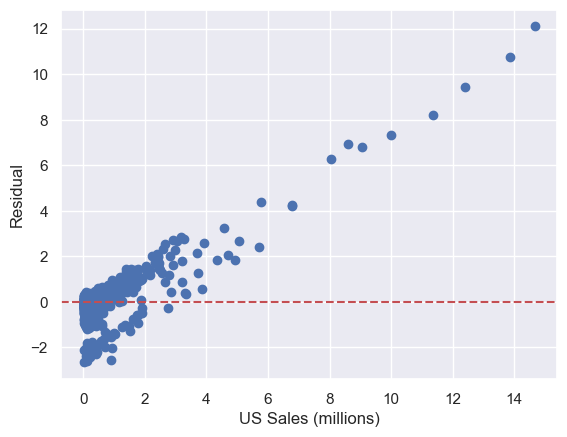

In [99]:
# Check for LINE, Linearing using fitted vs. residual plot on the train data
plt.scatter(df_train["Sales"], results.resid)
plt.axhline(y=0, color="r",linestyle='--')
plt.xlabel("US Sales (millions)")
plt.ylabel("Residual")
plt.show()

We find that this model is inappropriate to represent and summarize the relationship between Sales and MaxPlayers, Company, UsedPrice, Rating, and YearReleased. As seen in the fitted vs. residual plot, the data follows a linear relationship and falls away from the $y=0$ line. This also means that we cannot check the equal variance condition.

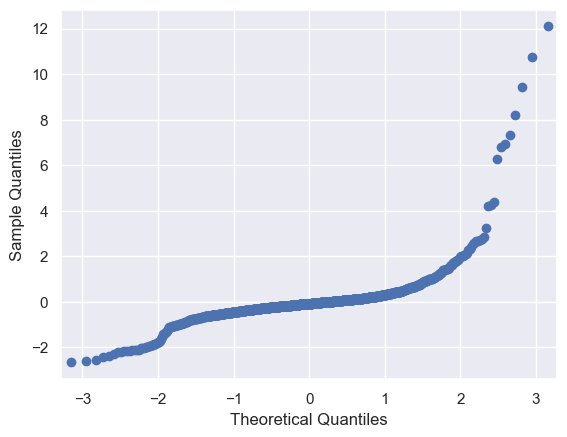

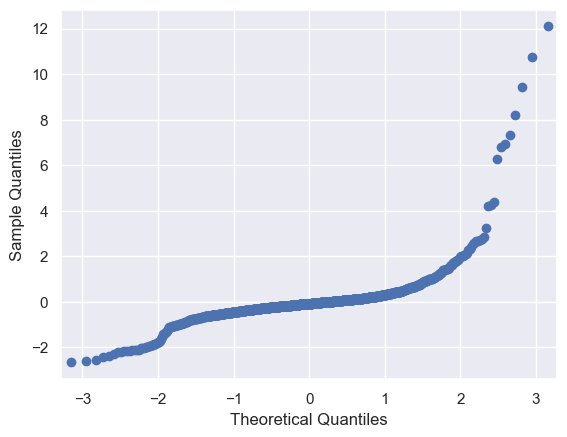

In [103]:
# Check for Normality
import statsmodels.api as sm
sm.qqplot(results.resid)

This QQPlot shows that both the training data and the fitted model's residual data do not follow a linear pattern. For this reason, we can conclude that our fitted model significantly deviates from a normal distribution, and therefore does not fit the normality condition.

### 2e. Performance Evaluation

In [104]:
results.rsquared

0.26509345448714994

In [105]:
from sklearn.metrics import root_mean_squared_error as rmse
rmse(df_test["Sales"], results.predict(df_test))

0.8940778472762846

In [106]:
df_test["Sales"].describe()

count    531.000000
mean       0.431469
std        0.921387
min        0.010000
25%        0.090000
50%        0.200000
75%        0.420000
max       10.030000
Name: Sales, dtype: float64

In our model, our $R^2$ value is $0.265$, which means that $26.5%$ of the variability in US Sales is explained by our model. This is a low $R^2$, which means that most of the variability is not explained by the model.

Our RMSE on our test data is $0.894$, which means that the typical error between the true US Sales count of a video game in the test data and the predicted US Sales count in the test data is $0.894$ million copies. This is extremely high, as the median number of US Sales for a video game is $0.2$ million copies, so the RMSE is nearly $4.5$ times the median sales number.

## 3. Logistic Regression Analytical Tasks

Our research question for this section is:

What is the relationship between the log-odds of a video game having a sequel and the **console** that a video game was released on, **the year that it was released**, the **review score** of a game, and if the game is in the **3rd person perspective** in our training data for video games released between 2004 and 2010? Is this model applicable to any new data that we may introduce? Then, can we use a classifier based off of this model to predict whether any given game?

In [ ]:
df["Sequel"].value_counts()

Sequel
1    920
0    843
2      7
Name: count, dtype: int64

In [113]:
df[df["Sequel"] == 2]

,Console,Title,Sales,Block4,Block2,Block1,Block05,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Rerelease,Usedprice,lnUsedPrice,ReviewScore,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson,Company
724,X360,The Elder Scrolls IV: Shivering Isles,0.18,0,0,0,0,2007,0,0,0,1,0,0,0,4028049,Bethesda Softworks LLC,"Action, Role-Playing (RPG)",2,0,24.95,3.216874,86,7396,0,0,1,2,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2K
725,X360,Final Fantasy XI: Wings of the Goddess,0.18,0,0,0,0,2007,0,0,0,1,0,0,0,4028049,"Square Enix, Inc., Square Enix, Ltd.","Action, Role-Playing (RPG)",2,0,13.95,2.635480,63,3969,0,0,0,2,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,SquareEnix
1158,X360,AC/DC Live: Rock Band - Track Pack,0.19,0,0,0,0,2008,0,0,0,0,1,0,0,4032064,MTV Games,"Action, Simulation",2,0,14.95,2.704711,63,3969,0,1,0,3,9,4,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2K
1161,PlayStation 3,AC/DC Live: Rock Band - Track Pack,0.19,0,0,0,0,2008,0,0,0,0,1,0,0,4032064,MTV Games,"Action, Simulation",2,0,14.95,2.704711,60,3600,0,1,0,2,4,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2K
1228,X360,Rock Band: Track Pack - Volume 2,0.10,0,0,0,0,2008,0,0,0,0,1,0,0,4032064,MTV Games,"Action, Simulation",2,0,17.95,2.887590,70,4900,0,1,0,3,9,4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2K
1729,X360,Dragon Age: Origins - Awakening,0.24,0,0,0,0,2010,0,0,0,0,0,0,1,4040100,"Electronic Arts, Inc.",Role-Playing (RPG),2,0,32.95,3.494991,80,6400,0,0,1,5,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

We found that there are 7 games where Sequel = 2, where this should not be the case, according to the codebook for this data. We found that all of these games are expansions of other games, so we decided to count them as sequels. So, we replaced the 2's with 1's.

In [114]:
df["Sequel"][df["Sequel"] == 2] = 1

/var/folders/_v/ncwq304d761gb02f1n7x_2vr0000gn/T/ipykernel_18122/2626708633.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Sequel"][df["Sequel"] == 2] = 1
/var/folders/_v/ncwq304d761gb02f1n7x_2vr0000gn/T/ipykernel_18122/2626708633.p

In [118]:
# Redo Train Test Split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=400)

### 3b. Fit Logistic Regression Model

In [121]:
# Review Score -> ReviewScore due to me removing all spaces from column names in part 1
results = smf.logit(formula="Sequel ~ Console + YearReleased + ReviewScore + ThirdPerson", data=df_train).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.638340
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Sequel   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1231
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                 0.07785
Time:                        20:40:03   Log-Likelihood:                -790.90
converged:                       True   LL-Null:                       -857.68
Covariance Type:            nonrobust   LLR p-value:                 1.141e-25
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   74.1736     99.719      0.744      0.457    -121.272     269.619
Console[T.Nintendo Wii]      0.3167      0.198      1.596      0.111      -0.072       0.706
Console[T.PlayStation 3]     0.6669      0.206      3.237      0.001       0.263       1.071
Console[T.Sony PSP]          0.2567      0.192      1.339      0.181      -0.119       0.632
Console[T.X360]              0.6489      0.181      3.582      0.000       0.294       1.004
YearReleased                -0.0387      0.050     -0.778      0.437      -0.136       0.059
ReviewScore                  0.0402      0.005      8.697      0.000       0.031       0.049
ThirdPerson                  0.5275      0.144      3.661      0.000       0.245       0.810
============================================================================================
"""

##### Levels of variables:

**Console**: The PlayStation3 is associated with higher probability levels of having a sequel, as it has the highest coefficient with $0.6669$.<br>
**YearReleased**: Earlier years are associated with higher probability levels of having a sequel, as it has a negative coefficient.<br>
**ReviewScore**: Higher rated games are associated with higher probability levels of having a sequel, as it has a positive coefficient.<br>
**ThirdPerson**: Games that are in third person perspective are associated with higher probability levels of having a sequel, as it has a positive coefficient.

In [125]:
print("Pseudo R2:", results.prsquared)

Pseudo R2: 0.07785300310975107


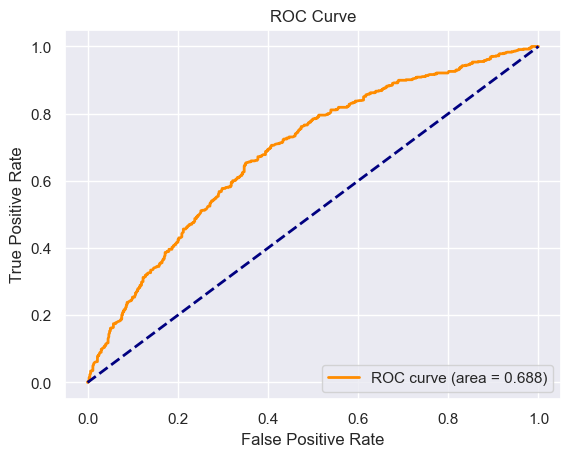

In [131]:
from sklearn.metrics import roc_curve
df_train["phat"] = results.predict(df_train)
fprs, tprs, thresholds = roc_curve(y_true=df_train['Sequel'], 
                            y_score=df_train['phat'])

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=df_train['Sequel'], 
                            y_score=df_train['phat'])

def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(fprs, tprs, auc)

Our pseudo-$R^2$ value is $0.0779$, which is an extremely low value, showing that our logistic model is a very weak fit. However, our AUC is $0.688$, which means that a classifier based off of our logistic regression model would be moderately strong. So, we wouldn't trust the predictions from the model without adding comments or remarks on top of the prediction.

### 3c. Build a Classifier

In [127]:
df_test["phat"] = results.predict(df_test)

In [134]:
df_threshold = pd.DataFrame({"threshold": thresholds, "fpr": fprs, "tpr": tprs})
df_threshold[(df_threshold["tpr"] > 0.62) & (df_threshold["tpr"] < 0.65)]

,threshold,fpr,tpr
293,0.535052,0.342327,0.620743
294,0.534748,0.344013,0.620743
295,0.533571,0.344013,0.625387
296,0.533318,0.347386,0.626935
297,0.532925,0.347386,0.633127
298,0.531261,0.347386,0.639319
299,0.530476,0.347386,0.643963
300,0.529972,0.349073,0.645511
301,0.529579,0.349073,0.648607
302,0.528882,0.350759,0.648607


In [136]:
# Initial Predictive Probability Threshold of 0.5
df_test["yhat"] = 1*(df_test["phat"] > 0.530476)
df_test.head(20)

,Console,Title,Sales,Block4,Block2,Block1,Block05,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Rerelease,Usedprice,lnUsedPrice,ReviewScore,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson,Company,phat,yhat
1497,X360,Transformers: Revenge of the Fallen,0.29,0,0,0,0,2009,0,0,0,0,0,1,0,4036081,"Activision Publishing, Inc.",Action,1,0,19.95,2.993229,61,3721,0,1,0,4,16,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Activision,0.533318,1
950,X360,Rock Band 2,1.85,0,0,1,1,2008,0,0,0,0,1,0,0,4032064,MTV Games,"Action, Simulation",1,0,19.95,2.993229,92,8464,0,1,0,3,9,4,16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2K,0.805260,1
499,PlayStation 3,Gran Turismo 5: Prologue,1.31,0,0,1,1,2007,0,0,0,1,0,0,0,4028049,"Sony Computer Entertainment America, Inc., Son...","Racing / Driving, Simulation",1,0,24.95,3.216874,80,6400,1,0,0,1,1,2,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,Sony,0.729735,1
1064,Nintendo Wii,Samba de Amigo,0.40,0,0,0,0,2008,0,0,0,0,1,0,0,4032064,"ak tronic Software & Services GmbH, SEGA Corpo...",Action,0,1,12.95,2.561096,68,4624,1,0,0,2,4,2,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sega,0.530365,0
1499,X360,Band Hero,0.28,0,0,0,0,2009,0,0,0,0,0,1,0,4036081,"Activision Publishing, Inc.","Action, Simulation",1,0,27.95,3.330417,76,5776,0,1,0,4,16,4,16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Activision,0.676347,1
172,Nintendo DS,Space Invaders Revolution,0.01,0,0,0,0,2005,0,1,0,0,0,0,0,4020025,"Mastiff, LLC, Rising Star Games Ltd.",Action,1,0,13.95,2.635480,49,2401,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [137]:
from sklearn.metrics import confusion_matrix as cm

cfm = cm(y_true=df_test["Sequel"], y_pred=df_test["yhat"])
tn, fp, fn, tp = cfm.ravel()

In [138]:
accuracy = (tp+tn)/len(df)
accuracy

0.1711864406779661

In [139]:
specificity = tn/(tn+fp)
specificity

0.54

In [140]:
sensitivity = tp/(tp+fn)
sensitivity

0.597864768683274

We want to minimize **false positives** in this classifier. A false positive mean that the game is a sequel of a franchise but it actually isn't. This could cause a game being overly hyped up or a company could think that a community for the game could exist, when in reality, there may not be due to the game not actually being a sequel.

With this in mind, We are not satisfied with the result of our logistic model and classifier. There are a few reasons why. First, the accuracy rate of our classifier is only $17.1%$, which is extremely low and the classifer cannot be trusted. Second, since we want to minimize false positives, it is important for our specificity to be extremely high. However, the specificity is $0.56$, which means that the false positive rate is $0.46$, which is extremely high.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

Summary: In our linear regression model, we attempted to predict the number of US Sales, in millions, for a video game from the maximum players that can play that game, the console it was released on, the used price of the game, the year that it was released, the rating of the game, and if it is a handheld game. Then, we tried to use inference to determine whether there is a relationship between the maximum number of players and sales. In our regression model, we got an $R^2$ value of $0.265$ and an RMSE of $0.894$, which means that our regression model is weak. Furthermore, we were able to establish (through inference) that there is a relationship between maximum number of players and sales of a game, but we are unable to trust this conclusion due to the fact that our model failed to check the linearity, normality, and equal variance conditions.
 
In our logistic regression model, we attempted to predict whether a game is a sequel in a franchise based on which console the game was released on, what year the game was released, the average review score of that game, and if that game has a third person perspective. Then, we built a classifier to predict whether a game is a sequel or not. For our logisitic regression model, we got a pseudo-$R^2$ of $0.0779$ and an AUC of $0.688$. Our pseudo-$R^2$ suggests that our logistic regression model is extremely weak and does fit well to the training data. Our AUC suggests that a classifier created based off of the logistic regression model would be moderately strong. After building the classifier, we wanted to reduce the false positive rate, but after selecting a probability threshold of $0.53$, we found that our accuracy rate was low at $0.17$ and our specificity was $0.54$, which means that our false positive rate was $0.46$, which is very high.

Limitations: First, one of the predictors we wanted to use for our linear regression model was price of the game. However, the dataset contained no data about initial price of the game, and only the used price, so we had to use that instead. Most of the data was in binary variables, including Rating and Company, which were both chosen predictors for our project. Which there were only 3 values for ratings, there were over 20 values for companies. Copy and pasting each one would’ve been an extreme hassle, so we decided to concat them all into one categorical variable that statsmodels could analyze. Furthermore, many of the column names featured spaces or other characters that caused the regression algorithms to fail. So, we had to remove those characters that made the algorithms fail. 

When constructing the logistic regression model, we realized that the Sequel variable, which was our response variable, contained values of 2 in the dataset. In the codebook, there was no indication of these values existing, so this we didn’t notice this quirk until we constructed our model. These values corresponded to expansions of existing games, but since we needed binary variables for the logistic model, we decided to consider these expansions as sequels (value of 1). Finally, in our logistic regression classifier, we tried to prioritize both false positives and accuracy, but unfortunately we were completely unable to improve both the false positive rate and accuracy at the same time. We believe that the data is too varied to be explained by a linear/logistic regression model.

Future Work: In the future, the dataset could be modified to concat the company, rating, and game attribute variables, as it would be a lot easier to perform analysis with these variables as categorical. Then, a variable with the original price of the game could be added. Then, using forward/backward selection (removing unnecessary and collinear predictors), new linear/logistic regression models could be created that would be stronger than what we have in this project. With these news columns, new research questions trying to predict the release price of the video game (which may be more helpful) can be constructed.